### Distribution Fitting: Normal and Cauchy Distribution

In [1]:
# import packages
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
ticker = 'TSLA'
start = '2019-10-31'
end = '2022-10-31'
# retrieve data
prices = np.array(yf.download(ticker, start, end)['Close'])
prices

[*********************100%%**********************]  1 of 1 completed


array([ 20.99466705,  20.88733292,  21.16466713,  21.14800072,
        21.77199936,  22.36933327,  22.47599983,  23.00600052,
        23.32866669,  23.0739994 ,  23.29000092,  23.47800064,
        23.3326664 ,  23.96800041,  23.48133278,  23.65533257,
        22.20266724,  22.42266655,  21.9279995 ,  22.08600044,
        21.99600029,  22.32466698,  22.41333389,  22.20199966,
        22.02466774,  22.39266777,  22.63533211,  23.25600052,
        23.51333237,  23.97866631,  23.89266777,  25.43333244,
        25.26600075,  26.20999908,  26.93600082,  27.03933334,
        27.94799995,  28.35000038,  28.72933388,  28.69199944,
        27.64666748,  27.88866615,  28.68400002,  29.5340004 ,
        30.10266685,  31.27066612,  32.8093338 ,  32.08933258,
        31.87666702,  34.99066544,  35.86133194,  34.56666565,
        34.23266602,  34.03333282,  36.47999954,  37.97066879,
        38.14666748,  37.6546669 ,  37.20133209,  37.79333115,
        38.73266602,  42.72066879,  43.37133408,  52.  

In [3]:
# Calculate returns
returns = np.log(prices[1:]/prices[:-1])
# sort returns
returns = np.sort(returns)
# construct empirical distribution function
edf = np.arange(1, len(returns)+1)/len(returns)

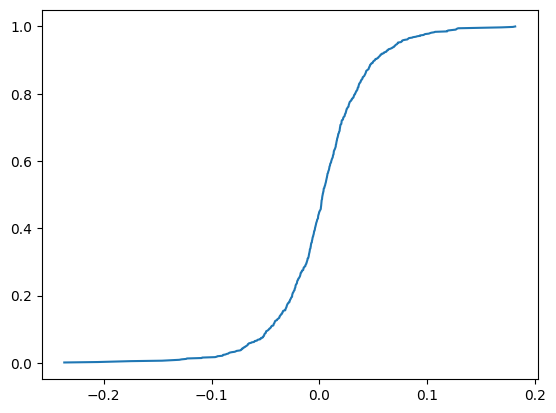

In [4]:
plt.plot(returns, edf)
plt.show()

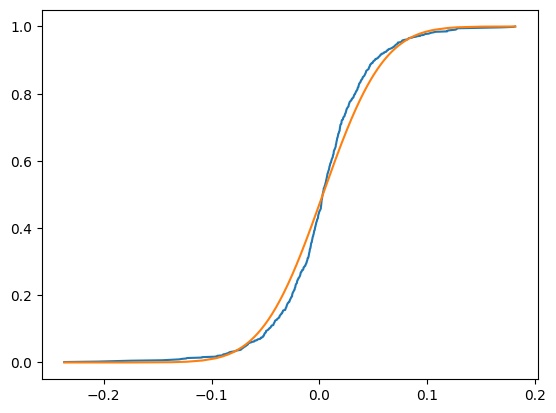

In [5]:
# construct normal distribution function
mean = np.average(returns)
std = np.std(returns)
normal_cdf = sps.norm.cdf(returns, mean, std)
# plot the distribution functions
plt.plot(returns, edf)
plt.plot(returns, normal_cdf)
plt.show()

In [8]:
# Apply the Kolmogorov-Smirnov Test on Normal distribution
p_value = np.exp(-len(returns)*max(abs(edf - normal_cdf))**2)
if p_value < 0.1:
    print('normal distribution does not fit the data: p-value '+str(round(p_value, 4)))
else:
    print('normal distribution fits the data: p-value '+str(round(p_value, 4)))

normal distribution does not fit the data: p-value 0.0245


In [9]:
# construct cauchy distribution function
median = np.quantile(returns, 0.5)
scale = (np.quantile(returns, 0.75) - np.quantile(returns, 0.25))/2
cauchy_cdf = 1/np.pi*np.arctan((returns - median)/scale) + 1/2

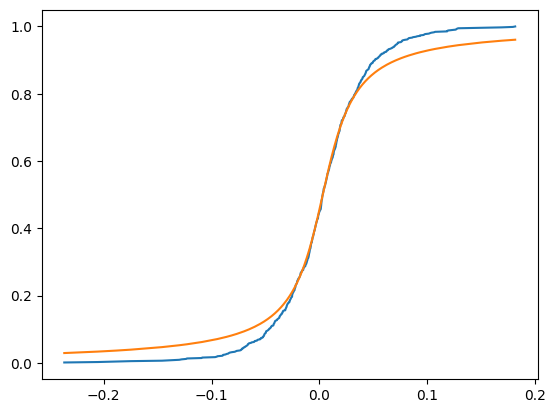

In [11]:
# plot the distribution function
plt.plot(returns, edf)
plt.plot(returns, cauchy_cdf)
plt.show()

In [12]:
# Apply the Kolmogorov-Smirnov Test for Cauchy Distribution
p_value = np.exp(-len(returns)*max(abs(edf - cauchy_cdf))**2)
if p_value < 0.1:
    print('Cauchy distribution does not fit the data: p-value '+str(round(p_value, 4)))
else:
    print('Cauchy distribution fits the data: p-value '+str(round(p_value, 4)))

Cauchy distribution fits the data: p-value 0.1194
